### this notebook makes plots of clustered objects with multiple observations from the same catalog

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import astropy as ast
import pandas as pd
import sys

from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.coordinates import Angle, Latitude, Longitude
import astropy.units as u

In [2]:
root = '/Users/alin/Documents/'

cat = pd.read_csv(root + 't3_db_input.txt', sep='\t', engine='python')

In [3]:
color_dict = {'ACS':'blue',\
              'WFPC2':'green',\
              'NICMOS':'red',\
              'WFC3':'black'}

# make circles manually because scatterplot doesn't want to scale correctly
radius = 0.25

costheta = [radius*np.cos(x) for x in np.arange(0,360,1)]
sintheta = [radius*np.sin(y) for y in np.arange(0,360,1)]

# flag 'd' indicates more than one object from any catalog
ambig = cat.loc[cat['comments'].str.contains('d')]

print 'num objects:', len(ambig)

print ambig['comments'].value_counts()

# de-duplicate IDs for groups
groups = set(ambig['id'])

print 'num sources:', len(groups)

num objects: 282
d2    88
d4    52
d3    36
d6    36
d5    35
d7    35
Name: comments, dtype: int64
num sources: 87


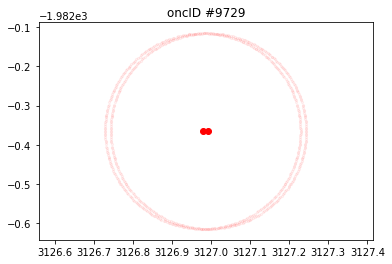

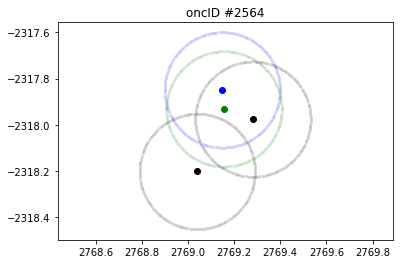

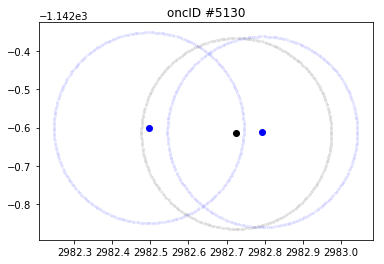

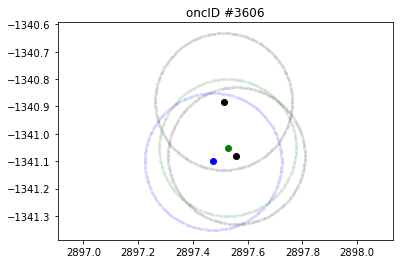

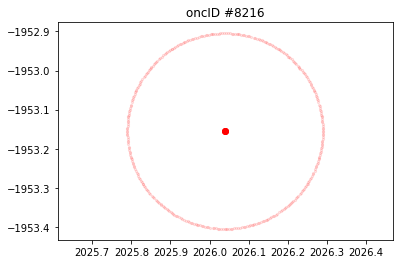

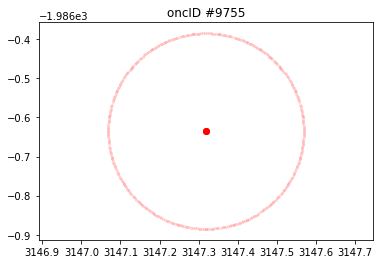

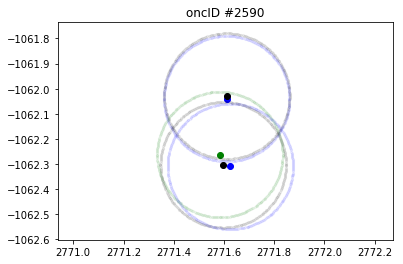

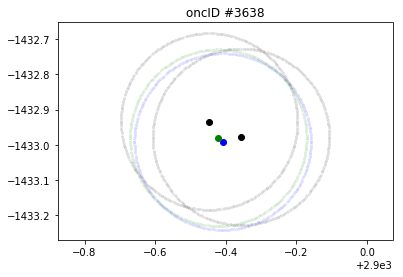

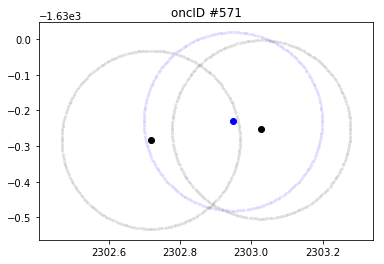

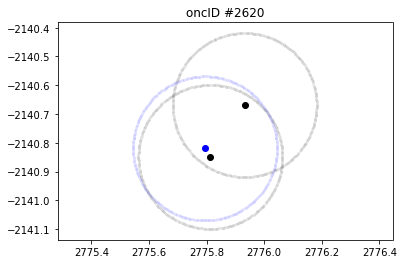

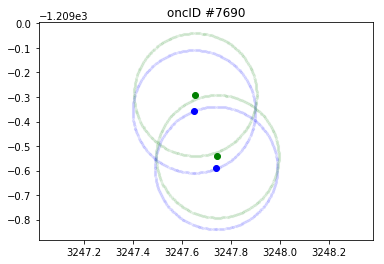

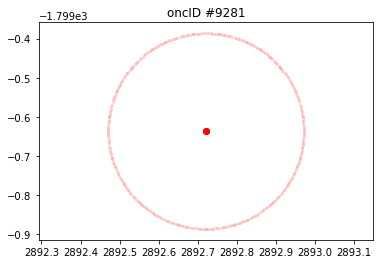

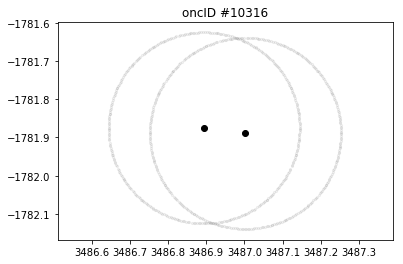

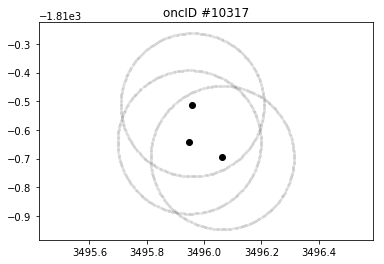

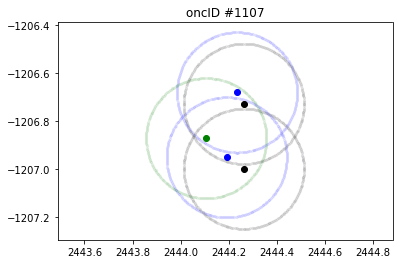

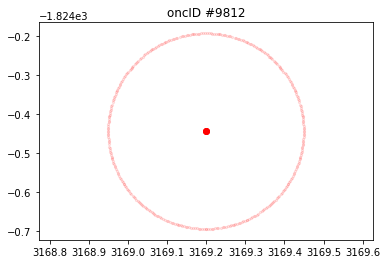

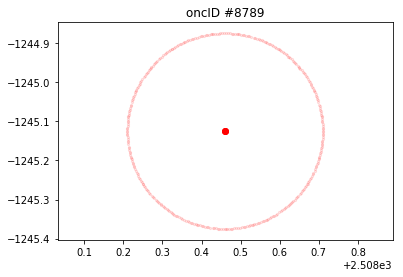

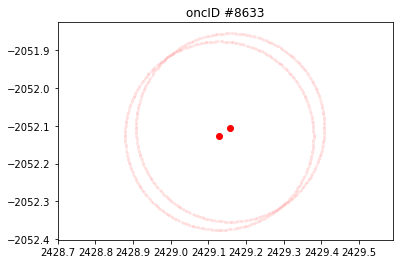

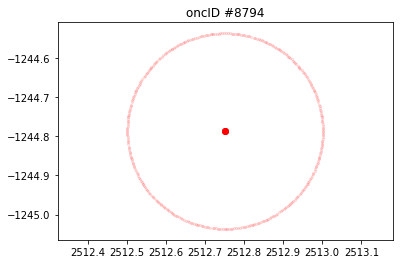

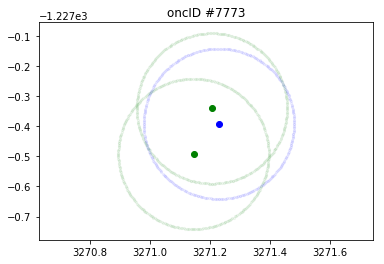

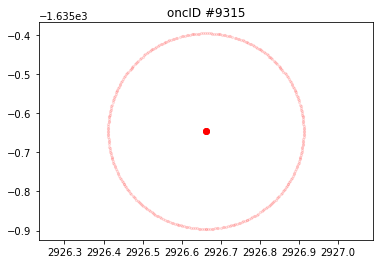

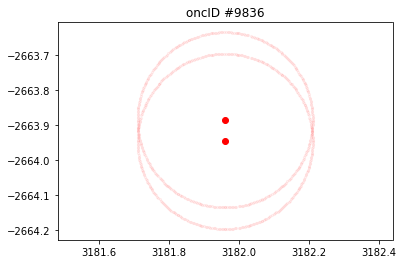

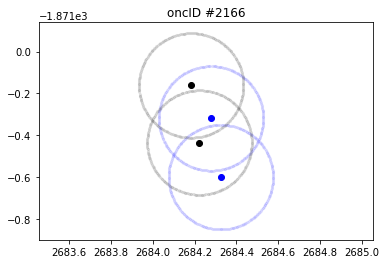

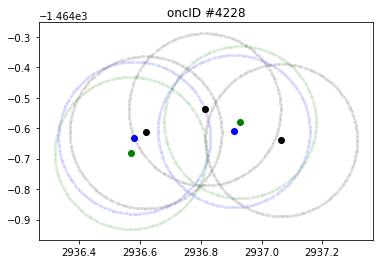

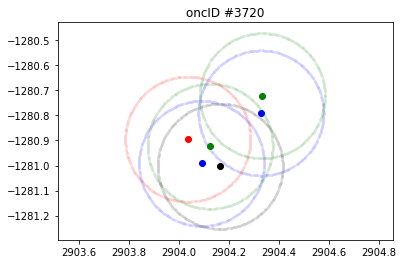

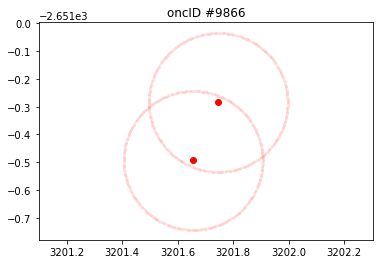

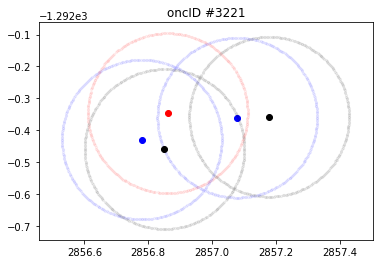

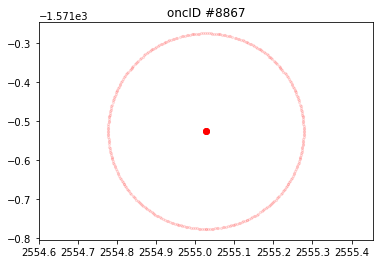

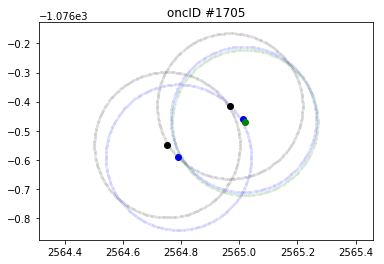

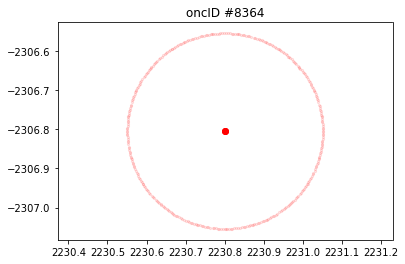

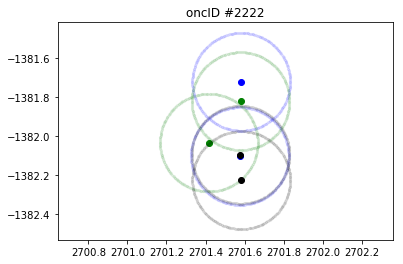

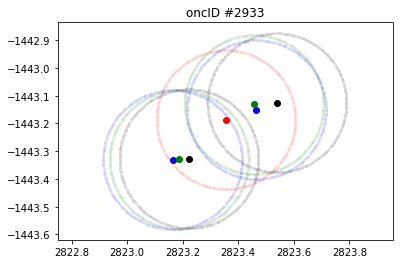

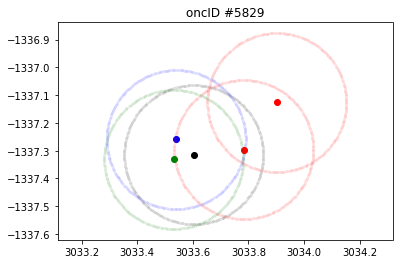

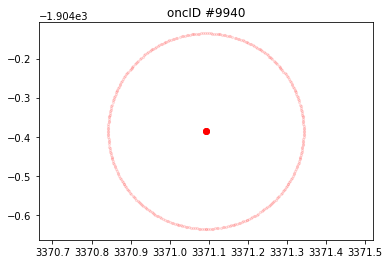

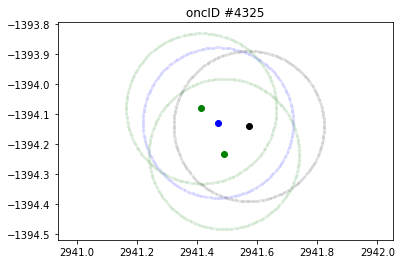

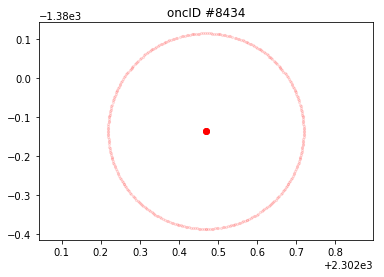

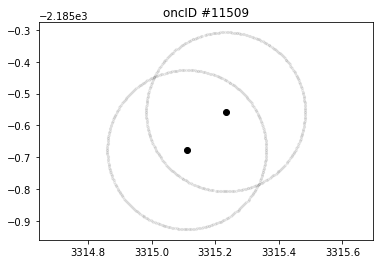

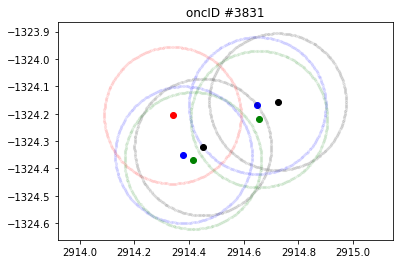

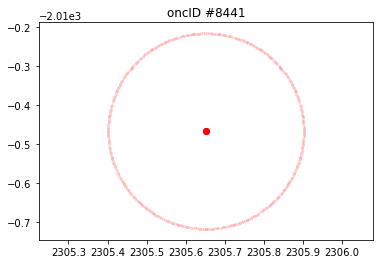

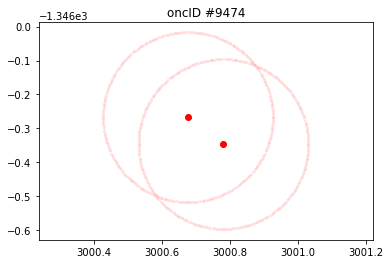

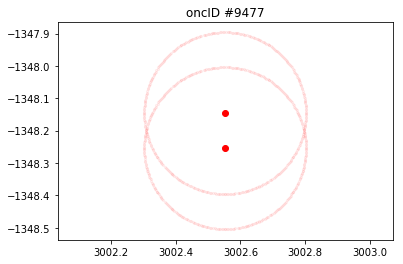

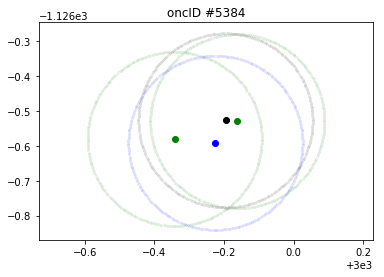

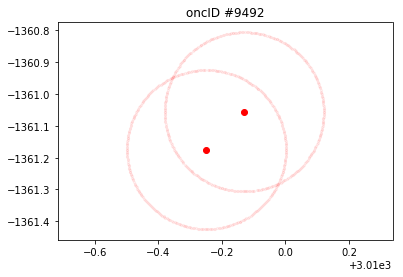

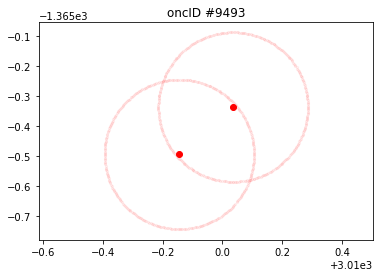

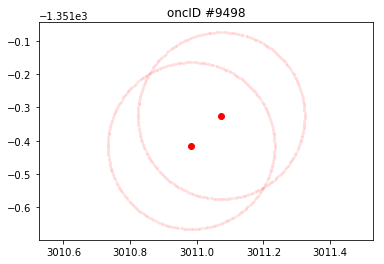

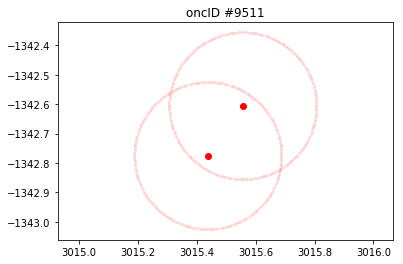

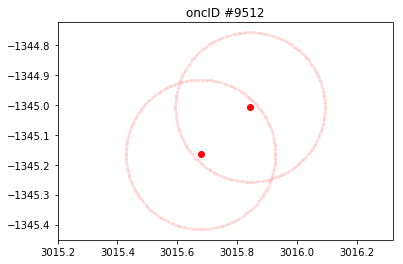

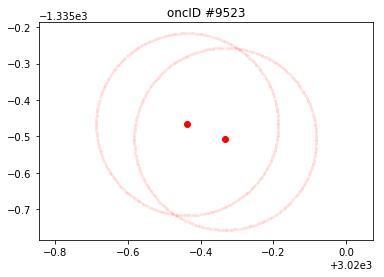

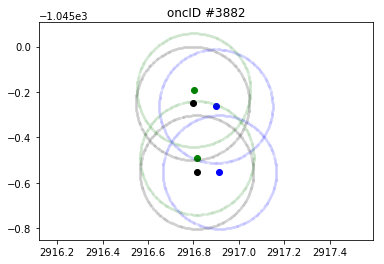

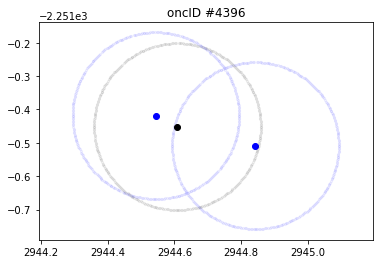

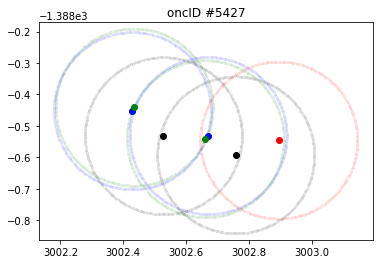

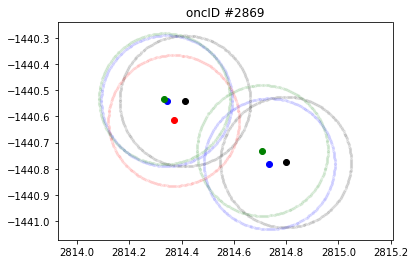

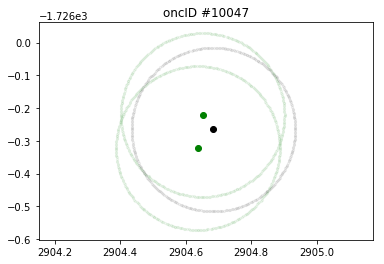

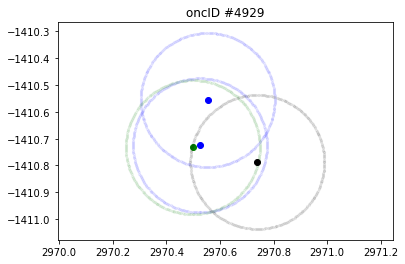

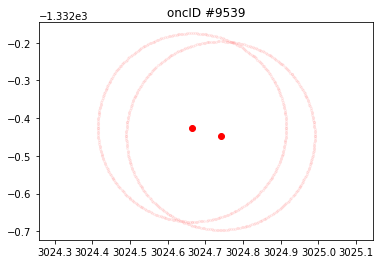

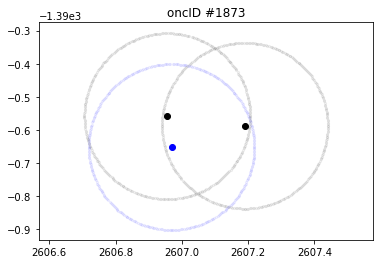

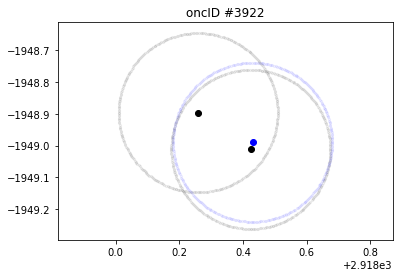

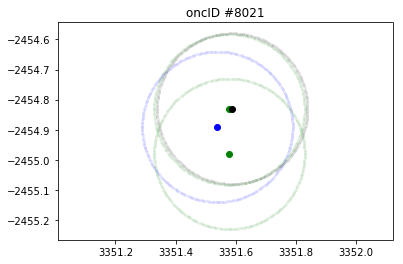

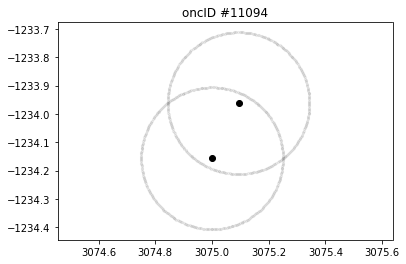

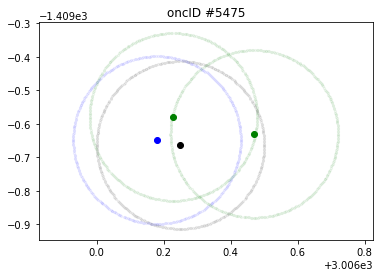

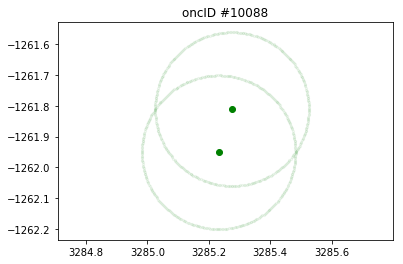

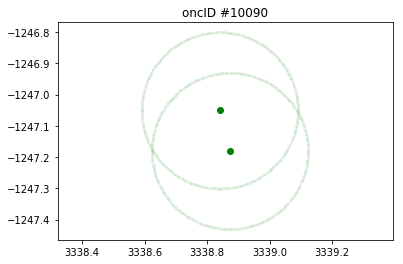

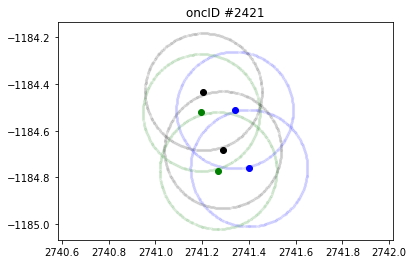

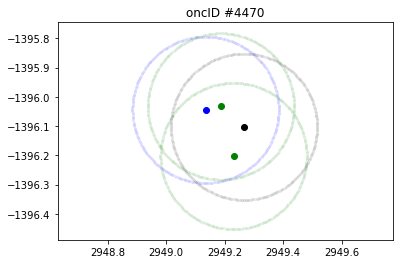

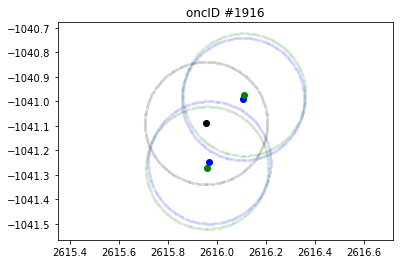

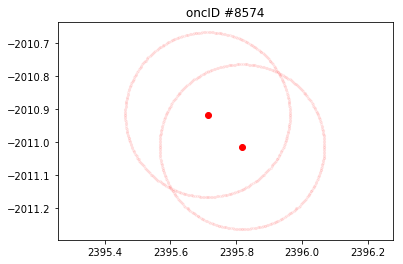

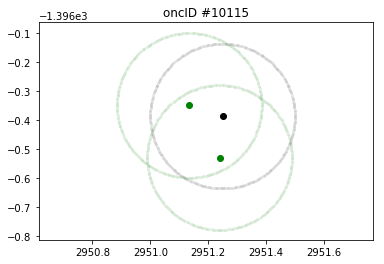

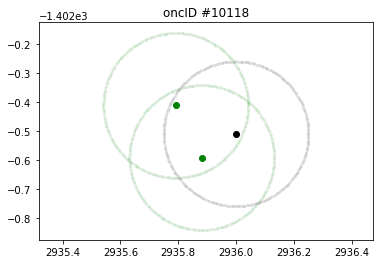

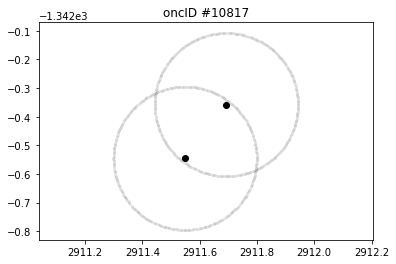

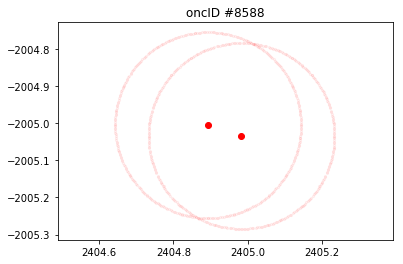

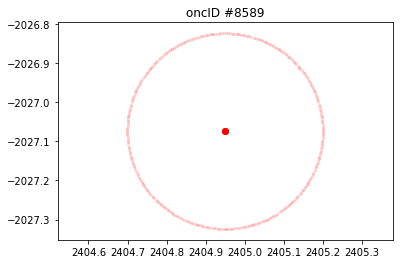

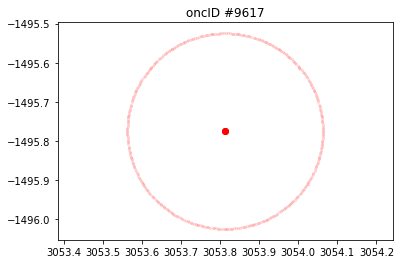

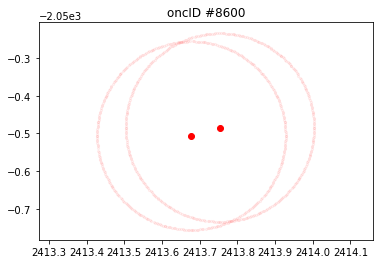

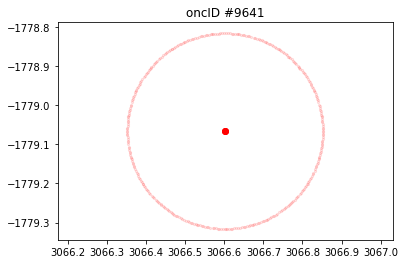

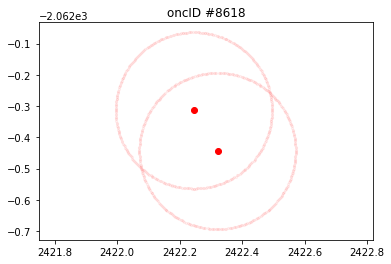

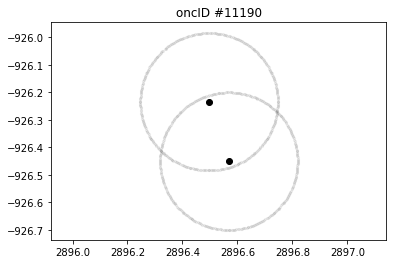

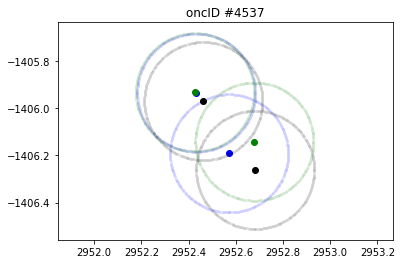

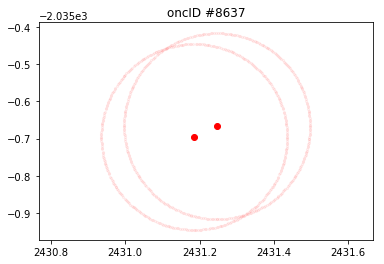

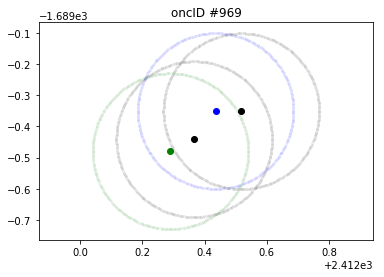

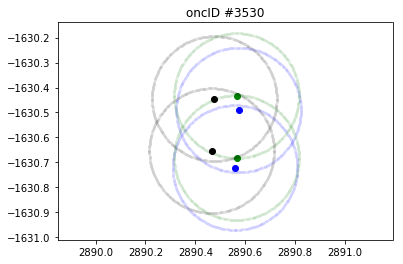

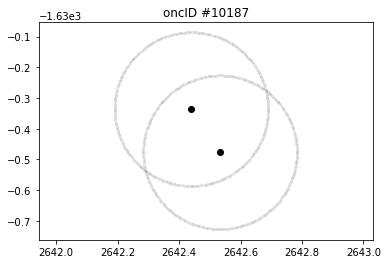

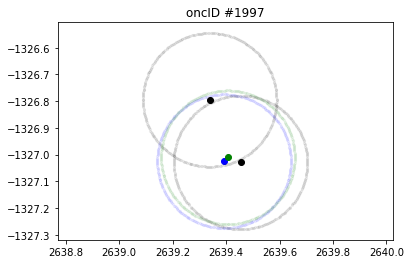

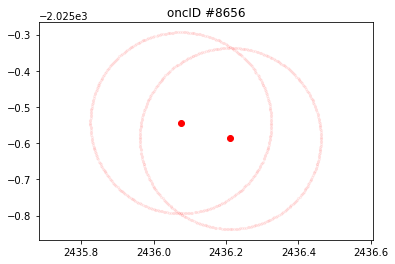

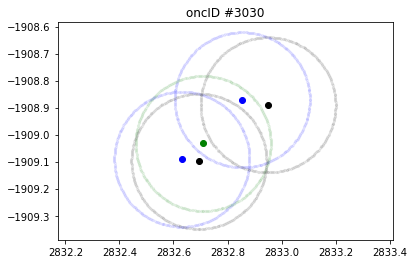

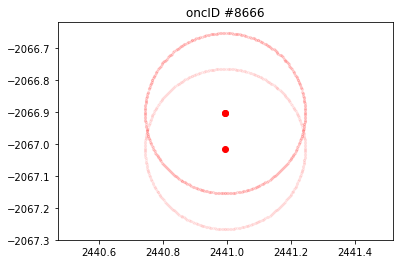

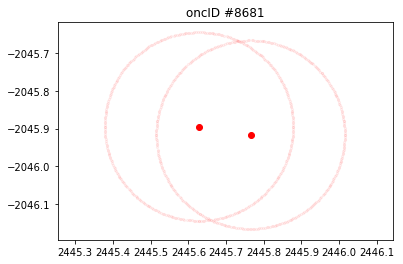

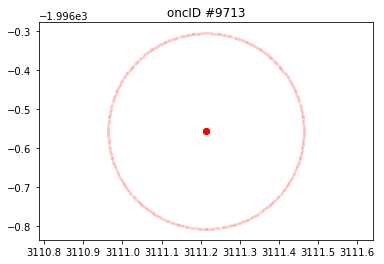

In [4]:
for thing in groups:
    obj = ambig.loc[cat['id'] == thing].reset_index()
    
    # in arcsec...
    obj_ra = (obj.loc[:,'ra_corr'] - 83.) * 3600.
    obj_de = (obj.loc[:,'dec_corr'] + 5.) * 3600.
    
    for i in range(len(obj_ra)):
        plt.scatter(obj_ra[i], obj_de[i], color=color_dict[obj['catname'][i]])
        plt.scatter(obj_ra[i]+costheta, obj_de[i]+sintheta, color=color_dict[obj['catname'][i]], s=5, alpha=0.05)

    # plt.xlim((min(obj_ra)-1,max(obj_ra)+1))
    # plt.ylim((min(obj_de)-1,max(obj_de)+1))
    
    plt.axis('equal')
    
    plt.title('oncID #' + str(int(thing)))

    plt.show()
    
    # plt.savefig(root + 'source_groups/' + str(int(thing)) + '.png', format='png')